In [3]:
import pandas as pd
import numpy as np

In [4]:
df = pd.read_csv("/Users/zeynepbahardeniz/Desktop/Students Social Media Addiction.csv")

In [5]:
needed_cols = ["Country", "Avg_Daily_Usage_Hours", "Most_Used_Platform", "Age"]
df_needed = df[needed_cols]

print(df_needed.head())

      Country  Avg_Daily_Usage_Hours Most_Used_Platform  Age
0  Bangladesh                    5.2          Instagram   19
1       India                    2.1            Twitter   22
2         USA                    6.0             TikTok   20
3          UK                    3.0            YouTube   18
4      Canada                    4.5           Facebook   21


In [8]:
df_needed = df_needed[df_needed["Avg_Daily_Usage_Hours"] <= 24]

In [9]:
original_len = len(df_needed)
df_needed = df_needed[df_needed["Avg_Daily_Usage_Hours"] <= 24]
print("Removed rows:", original_len - len(df_needed))

Removed rows: 0


Check for missing values

In [10]:
df_needed.isna().sum()

Country                  0
Avg_Daily_Usage_Hours    0
Most_Used_Platform       0
Age                      0
dtype: int64

In [11]:
print(df_needed.info())
print(df_needed.describe())
print(df_needed.sample(5))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 705 entries, 0 to 704
Data columns (total 4 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Country                705 non-null    object 
 1   Avg_Daily_Usage_Hours  705 non-null    float64
 2   Most_Used_Platform     705 non-null    object 
 3   Age                    705 non-null    int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 22.2+ KB
None
       Avg_Daily_Usage_Hours         Age
count             705.000000  705.000000
mean                4.918723   20.659574
std                 1.257395    1.399217
min                 1.500000   18.000000
25%                 4.100000   19.000000
50%                 4.800000   21.000000
75%                 5.800000   22.000000
max                 8.500000   24.000000
         Country  Avg_Daily_Usage_Hours Most_Used_Platform  Age
543  New Zealand                    4.3          Instagram   22
137     Pakistan   

In [13]:
country_avg = (df_needed.groupby("Country", as_index=False)["Avg_Daily_Usage_Hours"].mean().sort_values(by="Avg_Daily_Usage_Hours", ascending=False))

print(country_avg)

          Country  Avg_Daily_Usage_Hours
102           USA               6.890000
100           UAE               6.725000
61         Mexico               6.422222
27        Ecuador               6.300000
39          India               6.116981
..            ...                    ...
15         Bosnia               2.400000
14        Bolivia               2.400000
88   South Africa               2.300000
86       Slovakia               2.300000
92         Sweden               2.000000

[110 rows x 2 columns]


In [ ]:
!python3.13 -m pip install pytrends

In [15]:
countries = df_needed["Country"].dropna().unique()
print(countries)

['Bangladesh' 'India' 'USA' 'UK' 'Canada' 'Australia' 'Germany' 'Brazil'
 'Japan' 'South Korea' 'France' 'Spain' 'Italy' 'Mexico' 'Russia' 'China'
 'Sweden' 'Norway' 'Denmark' 'Netherlands' 'Belgium' 'Switzerland'
 'Austria' 'Portugal' 'Greece' 'Ireland' 'New Zealand' 'Singapore'
 'Malaysia' 'Thailand' 'Vietnam' 'Philippines' 'Indonesia' 'Taiwan'
 'Hong Kong' 'Turkey' 'Israel' 'UAE' 'Egypt' 'Morocco' 'South Africa'
 'Nigeria' 'Kenya' 'Ghana' 'Argentina' 'Chile' 'Colombia' 'Peru'
 'Venezuela' 'Ecuador' 'Uruguay' 'Paraguay' 'Bolivia' 'Costa Rica'
 'Panama' 'Jamaica' 'Trinidad' 'Bahamas' 'Iceland' 'Finland' 'Poland'
 'Romania' 'Hungary' 'Czech Republic' 'Slovakia' 'Croatia' 'Serbia'
 'Slovenia' 'Bulgaria' 'Estonia' 'Latvia' 'Lithuania' 'Ukraine' 'Moldova'
 'Belarus' 'Kazakhstan' 'Uzbekistan' 'Kyrgyzstan' 'Tajikistan' 'Armenia'
 'Georgia' 'Azerbaijan' 'Cyprus' 'Malta' 'Luxembourg' 'Monaco' 'Andorra'
 'San Marino' 'Vatican City' 'Liechtenstein' 'Montenegro' 'Albania'
 'North Macedonia' 'Kos

In [ ]:
!pip3 install pycountry # Need this because google trends search with not the country names but their codes as shown below

In [18]:
import pycountry

def get_country_code(name):
    try:
        return pycountry.countries.lookup(name).alpha_2
    except:
        return None

country_codes = {c: get_country_code(c) for c in countries}
print(country_codes)

{'Bangladesh': 'BD', 'India': 'IN', 'USA': 'US', 'UK': None, 'Canada': 'CA', 'Australia': 'AU', 'Germany': 'DE', 'Brazil': 'BR', 'Japan': 'JP', 'South Korea': 'KR', 'France': 'FR', 'Spain': 'ES', 'Italy': 'IT', 'Mexico': 'MX', 'Russia': None, 'China': 'CN', 'Sweden': 'SE', 'Norway': 'NO', 'Denmark': 'DK', 'Netherlands': 'NL', 'Belgium': 'BE', 'Switzerland': 'CH', 'Austria': 'AT', 'Portugal': 'PT', 'Greece': 'GR', 'Ireland': 'IE', 'New Zealand': 'NZ', 'Singapore': 'SG', 'Malaysia': 'MY', 'Thailand': 'TH', 'Vietnam': 'VN', 'Philippines': 'PH', 'Indonesia': 'ID', 'Taiwan': 'TW', 'Hong Kong': 'HK', 'Turkey': None, 'Israel': 'IL', 'UAE': None, 'Egypt': 'EG', 'Morocco': 'MA', 'South Africa': 'ZA', 'Nigeria': 'NG', 'Kenya': 'KE', 'Ghana': 'GH', 'Argentina': 'AR', 'Chile': 'CL', 'Colombia': 'CO', 'Peru': 'PE', 'Venezuela': 'VE', 'Ecuador': 'EC', 'Uruguay': 'UY', 'Paraguay': 'PY', 'Bolivia': 'BO', 'Costa Rica': 'CR', 'Panama': 'PA', 'Jamaica': 'JM', 'Trinidad': None, 'Bahamas': 'BS', 'Iceland':

In [19]:
country_codes = {k: v for k, v in country_codes.items() if v is not None}#remove failures

In [21]:
from pytrends.request import TrendReq
from pytrends import exceptions
import time
import pandas as pd
import random

pytrends = TrendReq(hl="en-US", tz=0)

keyword = ["Pop Mart"]
timeframe = "2025-01-01 2025-11-01"

trend_data = {}

for country, code in country_codes.items():
    if code is None:
        continue  # skip countries we couldn’t map

    print(f"--- {country} ({code}) ---")

    # simple retry logic
    for attempt in range(2):  # try at most 2 times
        try:
            pytrends.build_payload(
                kw_list=keyword,
                timeframe=timeframe,
                geo=code
            )

            data = pytrends.interest_over_time()

            if not data.empty:
                data = data.drop(columns=["isPartial"], errors="ignore")
                trend_data[country] = data
                print(f"✅ Data collected for {country}")
            else:
                print(f"❌ No data for {country}")

            # if we got here, break out of retry loop
            break

        except exceptions.TooManyRequestsError:
            print("⚠️ Hit Google rate limit (429). Waiting 60 seconds before retry...")
            time.sleep(60)  # wait and then retry once

    # short delay between countries to avoid hitting the limit again
    time.sleep(random.uniform(5, 10))


--- Bangladesh (BD) ---
❌ No data for Bangladesh
--- India (IN) ---
✅ Data collected for India
--- USA (US) ---
✅ Data collected for USA
--- Canada (CA) ---
✅ Data collected for Canada
--- Australia (AU) ---
✅ Data collected for Australia
--- Germany (DE) ---
✅ Data collected for Germany
--- Brazil (BR) ---
✅ Data collected for Brazil
--- Japan (JP) ---
✅ Data collected for Japan
--- South Korea (KR) ---
✅ Data collected for South Korea
--- France (FR) ---
✅ Data collected for France
--- Spain (ES) ---
✅ Data collected for Spain
--- Italy (IT) ---
✅ Data collected for Italy
--- Mexico (MX) ---
✅ Data collected for Mexico
--- China (CN) ---
✅ Data collected for China
--- Sweden (SE) ---
✅ Data collected for Sweden
--- Norway (NO) ---
✅ Data collected for Norway
--- Denmark (DK) ---
✅ Data collected for Denmark
--- Netherlands (NL) ---
✅ Data collected for Netherlands
--- Belgium (BE) ---
✅ Data collected for Belgium
--- Switzerland (CH) ---
✅ Data collected for Switzerland
--- Austria (

In [23]:
country_avg_interest = {}

for country, df in trend_data.items():
    country_avg_interest[country] = df["Pop Mart"].mean()

avg_df = (
    pd.DataFrame.from_dict(country_avg_interest, orient="index", columns=["Avg_Search_Interest"])
    .rename_axis("Country")
    .reset_index()
)

print(avg_df)

      Country  Avg_Search_Interest
0       India            26.704545
1         USA            45.886364
2      Canada            45.840909
3   Australia            56.250000
4     Germany            28.818182
..        ...                  ...
68     Kuwait            15.840909
69    Bahrain             9.000000
70       Oman             4.340909
71   Pakistan            19.181818
72      Nepal             2.272727

[73 rows x 2 columns]


In [34]:
final_df = pd.merge(
    country_avg,          # Country + Avg_Daily_Usage_Hours
    avg_df,               # Country + Avg_Search_Interest
    on="Country",
    how="inner"           # keep only countries that exist in both datasets
)

final_df["Country_Code"] = final_df["Country"].map(country_codes)

print(final_df)

           Country  Avg_Daily_Usage_Hours  Avg_Search_Interest Country_Code
0              USA               6.890000            45.886364           US
1           Mexico               6.422222            27.909091           MX
2          Ecuador               6.300000            17.909091           EC
3            India               6.116981            26.704545           IN
4   Czech Republic               6.100000            25.181818           CZ
..             ...                    ...                  ...          ...
68          Taiwan               2.600000            61.272727           TW
69         Belarus               2.500000             8.000000           BY
70    South Africa               2.300000            22.886364           ZA
71        Slovakia               2.300000            18.568182           SK
72          Sweden               2.000000            35.113636           SE

[73 rows x 4 columns]


In [78]:
final_df.to_csv("country_screen_vs_interest.csv", index=False)


In [36]:
eda_df = pd.read_csv("country_screen_vs_interest.csv")
print(eda_df.describe())

       Avg_Daily_Usage_Hours  Avg_Search_Interest
count              73.000000            73.000000
mean                4.522969            28.693960
std                 1.123926            18.395826
min                 2.000000             2.272727
25%                 3.650000            14.318182
50%                 4.700000            27.909091
75%                 5.400000            39.545455
max                 6.890000            78.272727


In [37]:
all_countries = set(country_avg["Country"])

trend_countries = set(avg_df["Country"])

removed_countries = all_countries - trend_countries

removed_df = pd.DataFrame({"Deleted countries with no data found on google trends": list(removed_countries)})
print(removed_df)

   Deleted countries with no data found on google trends
0                                             Andorra   
1                                              Bosnia   
2                                     North Macedonia   
3                                               Malta   
4                                             Bolivia   
5                                             Iceland   
6                                            Maldives   
7                                                 UAE   
8                                               Kenya   
9                                              Jordan   
10                                            Jamaica   
11                                              Ghana   
12                                                 UK   
13                                            Bahamas   
14                                         Tajikistan   
15                                         Montenegro   
16                             

In [53]:
import pandas as pd

def compute_iqr(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    return Q1, Q3, IQR

# IQR for screen time
screen_Q1, screen_Q3, screen_IQR = compute_iqr(final_df["Avg_Daily_Usage_Hours"])

# IQR for search interest
interest_Q1, interest_Q3, interest_IQR = compute_iqr(final_df["Avg_Search_Interest"])

print("=== IQR: Screen Time ===")
print("Q1:", screen_Q1)
print("Q3:", screen_Q3)
print("IQR:", screen_IQR)

print("\n=== IQR: Search Interest ===")
print("Q1:", interest_Q1)
print("Q3:", interest_Q3)
print("IQR:", interest_IQR)


=== IQR: Screen Time ===
Q1: 3.65
Q3: 5.4
IQR: 1.7500000000000004

=== IQR: Search Interest ===
Q1: 14.318181818181818
Q3: 39.54545454545455
IQR: 25.227272727272727


In [ ]:
!pip3 install seaborn

In [ ]:
!pip3 install adjustText

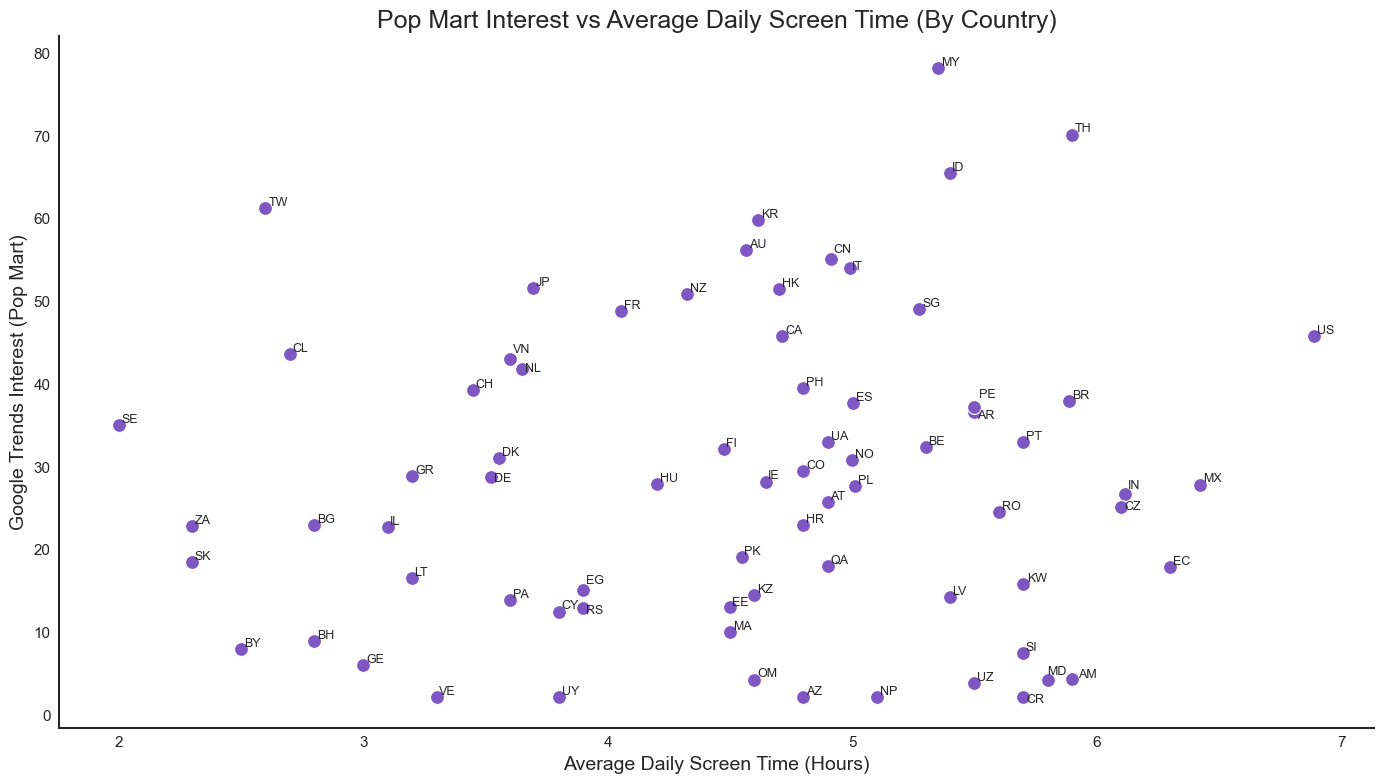

In [79]:
import seaborn as sns
import matplotlib.pyplot as plt
from adjustText import adjust_text

plt.figure(figsize=(14, 8))
sns.set_theme(style="white")

sns.scatterplot(
    data=final_df,
    x="Avg_Daily_Usage_Hours",
    y="Avg_Search_Interest",
    s=100,
    color="#7E57C2"
)

# Labels
texts = []
for _, row in final_df.iterrows():
    texts.append(
        plt.text(
            row["Avg_Daily_Usage_Hours"],
            row["Avg_Search_Interest"],
            row["Country_Code"],
            fontsize=9
        )
    )

adjust_text(
    texts,
    arrowprops=dict(arrowstyle="-", lw=0.5, color="gray")
)

# Titles
plt.title("Pop Mart Interest vs Average Daily Screen Time (By Country)", fontsize=18)
plt.xlabel("Average Daily Screen Time (Hours)", fontsize=14)
plt.ylabel("Google Trends Interest (Pop Mart)", fontsize=14)


ax = plt.gca()

ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

# Make bottom + left axis lines thicker
ax.spines["bottom"].set_linewidth(1.5)
ax.spines["left"].set_linewidth(1.5)

# TICK MARKS INSIDE THE PLOT 
ax.tick_params(
    axis='both',
    which='major',
    length=8,
    width=1.5,
    direction='in',   
    pad=6,
    color="black"
)

#disable seaborn’s automatic spine trimming
sns.despine(trim=False)

plt.tight_layout()
plt.show()

In [80]:
#Apply Pearson and calculate the p value
from scipy.stats import pearsonr

corr, p_value = pearsonr(final_df["Avg_Daily_Usage_Hours"],
                         final_df["Avg_Search_Interest"])

print("Pearson correlation:", corr)
print("p-value:", p_value)


Pearson correlation: 0.08415036664161739
p-value: 0.47905174813507695


After the pearson test we can see that p > 0.05 so we fail to reject null hypothesis.

In [81]:
#Apply Spearman for p value
from scipy.stats import spearmanr

rho, p = spearmanr(final_df["Avg_Daily_Usage_Hours"],
                   final_df["Avg_Search_Interest"])

print("Spearman correlation:", rho)
print("p-value:", p)


Spearman correlation: 0.05546767134440417
p-value: 0.6411472122156734


Also after trying the spearman test we can still see that p > 0.05. Therefore, we can conclude that there is not a a significant relation between teh average screen time and consuming behaviours measured by the trends of 2025.



Now, lets analyse the rest of csv

In [83]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

orig = pd.read_csv("Students Social Media Addiction.csv")
merged = pd.read_csv("country_screen_vs_interest.csv")


#Most used platform per country (mode)
df_platform = orig[["Country", "Most_Used_Platform"]].dropna()

country_platform = (
    df_platform
    .groupby("Country")["Most_Used_Platform"]
    .agg(lambda x: x.mode().iloc[0] if not x.mode().empty else None)
    .reset_index()
)

# Top 10 countries by Avg_Search_Interest
top10 = (
    merged
    .sort_values(by="Avg_Search_Interest", ascending=False)
    .head(10)
)

top10_with_platform = top10.merge(
    country_platform,
    on="Country",
    how="left"
)

In [84]:
nice_table = (
    top10_with_platform
    .loc[:, ["Country", "Avg_Daily_Usage_Hours", "Avg_Search_Interest", "Most_Used_Platform"]]
    .rename(columns={
        "Avg_Daily_Usage_Hours": "Avg_Screen_Time_Hours",
        "Avg_Search_Interest": "Avg_Search_Interest_PopMart",
        "Most_Used_Platform": "Top_Platform"
    })
)

# Round numeric columns
nice_table["Avg_Screen_Time_Hours"] = nice_table["Avg_Screen_Time_Hours"].round(2)
nice_table["Avg_Search_Interest_PopMart"] = nice_table["Avg_Search_Interest_PopMart"].round(2)

print("=== Top 10 countries by Pop Mart search interest (with dominant platform) ===")
print(nice_table.to_string(index=False))


=== Top 10 countries by Pop Mart search interest (with dominant platform) ===
    Country  Avg_Screen_Time_Hours  Avg_Search_Interest_PopMart Top_Platform
   Malaysia                   5.35                        78.27     WhatsApp
   Thailand                   5.90                        70.20    Instagram
  Indonesia                   5.40                        65.55       TikTok
     Taiwan                   2.60                        61.27     LinkedIn
South Korea                   4.62                        59.86    KakaoTalk
  Australia                   4.56                        56.25    Instagram
      China                   4.91                        55.20       WeChat
      Italy                   4.99                        54.11       TikTok
      Japan                   3.70                        51.70         LINE
  Hong Kong                   4.70                        51.59    Instagram


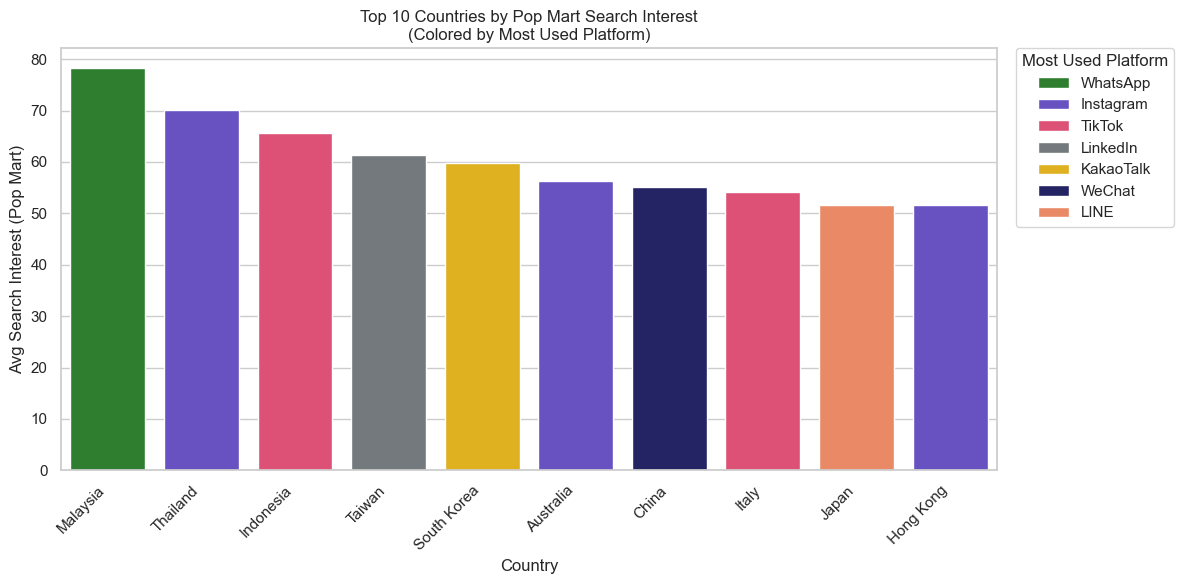

In [85]:
import seaborn as sns
import matplotlib.pyplot as plt


# Visualization 

sns.set_theme(style="whitegrid")

# Platform → Color mapping with your hex codes
platform_colors = {
    "Instagram": "#5D3FD3",   # purple
    "TikTok": "#F33A6A",      # pink
    "WhatsApp": "#228B22",    # green
    "Facebook": "#0096FF",    # blue
    "LINE": "#FF7F50",        # coral
    "WeChat": "#191970",      # midnight blue
    "LinkedIn": "#71797E",    # grey
    "KakaoTalk": "#FFC000",   # yellow
    "Snapchat": "#FF0000",    # red
    "Twitter": "#967969",     # mocha
    "YouTube": "#A52A2A",     # brown
    
}

plt.figure(figsize=(12, 6))

# Order countries by interest
order = nice_table.sort_values(
    "Avg_Search_Interest_PopMart",
    ascending=False
)["Country"]

sns.barplot(
    data=nice_table,
    x="Country",
    y="Avg_Search_Interest_PopMart",
    hue="Top_Platform",              # color by platform
    order=order,
    palette=platform_colors          # dict mapping platform -> color
)

plt.title("Top 10 Countries by Pop Mart Search Interest\n(Colored by Most Used Platform)")
plt.xlabel("Country")
plt.ylabel("Avg Search Interest (Pop Mart)")

plt.xticks(rotation=45, ha="right")

# Put legend outside so it doesn’t overlap
plt.legend(
    title="Most Used Platform",
    bbox_to_anchor=(1.02, 1),
    loc="upper left",
    borderaxespad=0
)

plt.tight_layout()
plt.show()


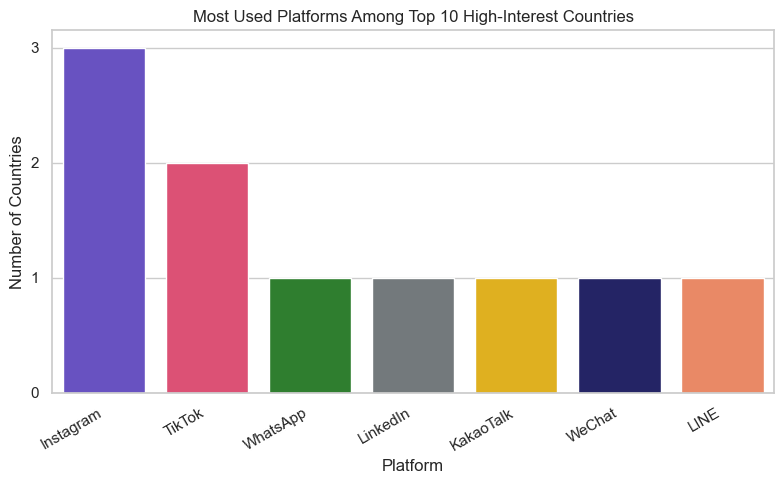

In [87]:

# Visualization (platform counts with same colors + integer ticks)
import matplotlib.ticker as ticker

plt.figure(figsize=(8, 5))

platform_counts = (
    nice_table["Top_Platform"]
    .value_counts()
    .reset_index()
)
platform_counts.columns = ["Platform", "Count"]

sns.barplot(
    data=platform_counts,
    x="Platform",
    y="Count",
    hue="Platform",
    palette=platform_colors,
    dodge=False
)

plt.title("Most Used Platforms Among Top 10 High-Interest Countries")
plt.xlabel("Platform")
plt.ylabel("Number of Countries")

plt.xticks(rotation=30, ha="right")

ax = plt.gca()
ax.yaxis.set_major_locator(ticker.MaxNLocator(integer=True))

plt.legend([], [], frameon=False)

plt.tight_layout()
plt.show()


Now we have a categorical variable which is top used platforms, and average search interes we can perform ANOVA test. I will test if dominantly used platformshow significantly different consuming behaviours across countries.

In [88]:
import scipy.stats as stats

groups = []

for platform in nice_table["Top_Platform"].unique():
    group_vals = merged.loc[merged["Country"].isin(
        nice_table.loc[nice_table["Top_Platform"] == platform, "Country"]
    )]["Avg_Search_Interest"]
    groups.append(group_vals)

F, p = stats.f_oneway(*groups)
print("ANOVA p-value:", p)


ANOVA p-value: 0.608410307114452


Again p > 0.05 so we can conclude that platform is not an indicator.